In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("D:\Power BI\Hyderabad Assigment\data\loan_approval_dataset.json")
df.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [56]:
df.shape

(252000, 13)

In [3]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [4]:
df.duplicated().sum()

0

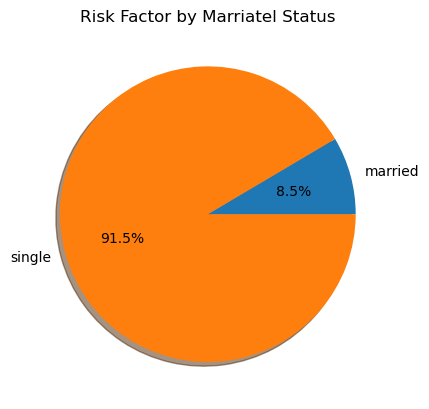

In [52]:
Married = df.groupby(['Married/Single'])['Risk_Flag'].sum()

Married.plot(kind='pie',autopct='%1.1f%%',title='Risk Factor by Marriatel Status',ylabel='',shadow=True)
plt.show()

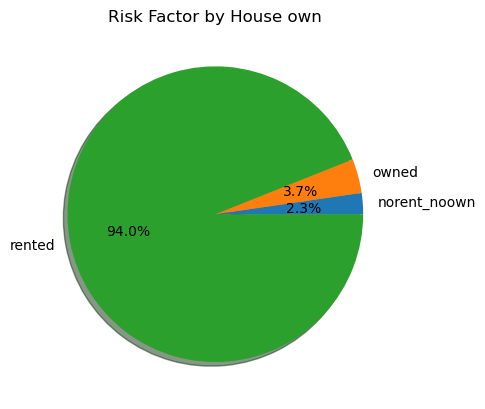

In [57]:
House = df.groupby(['House_Ownership'])['Risk_Flag'].sum()
House.plot(kind='pie',autopct='%1.1f%%',title='Risk Factor by House own',ylabel='',shadow=True)
plt.show()

<Figure size 1500x800 with 0 Axes>

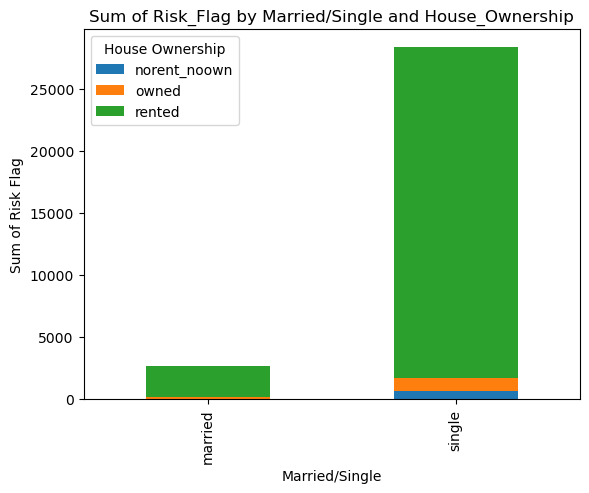

In [61]:
plt.figure(figsize=(15,8))
Married_House = df.groupby(['Married/Single','House_Ownership'])['Risk_Flag'].sum().unstack()
Married_House.plot(kind='bar',stacked=True)
plt.xlabel('Married/Single')
plt.ylabel('Sum of Risk Flag')
plt.title('Sum of Risk_Flag by Married/Single and House_Ownership')
plt.legend(title='House Ownership')
plt.show()

# Top 5 High Risk Profession 

In [62]:
profession_risk = df.groupby('Profession')['Risk_Flag'].mean().reset_index()
profession_high_risk = profession_risk.sort_values(by='Risk_Flag', ascending=False)

profession_high_risk.head(5)

,Profession,Risk_Flag
38,Police_officer,0.164052
7,Chartered_Accountant,0.153572
3,Army_officer,0.152113
46,Surveyor,0.151464
43,Software_Developer,0.148427


# Top 5 Low Risk Profession

In [63]:
profession_low_risk = profession_risk.sort_values(by='Risk_Flag',ascending=True)
profession_low_risk.head(5)

,Profession,Risk_Flag
49,Technology_specialist,0.081486
36,Petroleum_Engineer,0.085102
29,Industrial_Engineer,0.098667
20,Economist,0.099278
23,Financial_Analyst,0.103155


In [64]:
df.drop(columns=['CITY','STATE'],inplace= True)
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,0,10,0


In [65]:
df_encoded = pd.get_dummies(df, columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession'])
df_encoded

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,1,1303834,23,3,3,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,9,13,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,3991815,66,4,4,10,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,6256451,41,2,2,12,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5,5768871,47,11,3,14,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,6,11,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
251996,251997,2843572,26,10,6,11,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251997,251998,4522448,46,7,7,12,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251998,251999,6507128,45,0,0,10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X = df_encoded.drop('Risk_Flag',axis=1)
Y = df['Risk_Flag']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [68]:
RFC = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42,min_samples_split=15)

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [70]:
RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=15, random_state=42)

In [71]:
y_pred = RFC.predict(X_test) 

In [72]:
from sklearn.metrics import accuracy_score  

In [73]:
accuracy_score(y_test,y_pred)               

0.9089285714285714